# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# READING FILE

In [2]:
file = pd.read_csv('Sales Records.csv')
file.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45


### CHANGING THE {Order Date and Ship Date} INTO A DATETIME FORMAT

In [3]:
file['Ship Date'] = pd.to_datetime(file['Ship Date'])
file['Order Date'] = pd.to_datetime(file['Order Date'])

In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          1000 non-null   object        
 1   Country         1000 non-null   object        
 2   Item Type       1000 non-null   object        
 3   Sales Channel   1000 non-null   object        
 4   Order Priority  1000 non-null   object        
 5   Order Date      1000 non-null   datetime64[ns]
 6   Order ID        1000 non-null   int64         
 7   Ship Date       1000 non-null   datetime64[ns]
 8   Units Sold      1000 non-null   int64         
 9   Unit Price      1000 non-null   float64       
 10  Unit Cost       1000 non-null   float64       
 11  Total Revenue   1000 non-null   float64       
 12  Total Cost      1000 non-null   float64       
 13  Total Profit    1000 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
mem

In [5]:
file.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+03,1000.000000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.496813e+08,5053.988000,262.10684,184.965110,1.327322e+06,9.361192e+05,3.912026e+05
std,2.571334e+08,2901.375317,216.02106,175.289311,1.486515e+06,1.162571e+06,3.836402e+05
min,1.029280e+08,13.000000,9.33000,6.920000,2.043250e+03,1.416750e+03,5.326100e+02
25%,3.280740e+08,2420.250000,81.73000,56.670000,2.811919e+05,1.649319e+05,9.837612e+04
50%,5.566097e+08,5184.000000,154.06000,97.440000,7.549392e+05,4.647261e+05,2.772260e+05
75%,7.696945e+08,7536.750000,421.89000,263.330000,1.733503e+06,1.141750e+06,5.484568e+05
max,9.955298e+08,9998.000000,668.27000,524.960000,6.617210e+06,5.204978e+06,1.726181e+06


# PERFORMING BASIC STUFFS ON THE DATA

In [6]:
unique_region = file.Region.unique()
unique_country = file.Country.unique()
unique_Item_type= file['Item Type'].unique()
unique_Priority_order = file['Order Priority'].unique()
print(unique_region)
print(unique_country)
print(unique_Item_type)
print(unique_Priority_order)

['Middle East and North Africa' 'North America' 'Asia'
 'Sub-Saharan Africa' 'Europe' 'Central America and the Caribbean'
 'Australia and Oceania']
['Libya' 'Canada' 'Japan' 'Chad' 'Armenia' 'Eritrea' 'Montenegro'
 'Jamaica' 'Fiji' 'Togo' 'Greece' 'Sudan' 'Maldives' 'Estonia' 'Greenland'
 'Cape Verde' 'Senegal' 'Federated States of Micronesia' 'Bulgaria'
 'Algeria' 'Mongolia' 'Grenada' 'Mauritius ' 'Morocco' 'Honduras' 'Benin'
 'Equatorial Guinea' 'Swaziland' 'Trinidad and Tobago' 'Sweden' 'Belarus'
 'Guinea-Bissau' 'Turkey' 'Central African Republic' 'Laos' 'Israel'
 'Bhutan' 'Vanuatu' 'Burundi' 'Ukraine' 'Croatia' 'Madagascar' 'Malaysia'
 'Uzbekistan' 'Italy' 'Nepal' 'Portugal' 'Panama' 'Botswana' 'Tanzania'
 'Romania' 'Mali' 'Niger' 'Austria' 'India' 'Luxembourg' 'Iceland' 'Qatar'
 'South Sudan' 'United Kingdom' 'Tunisia ' 'United States of America'
 'Liberia' 'South Korea' 'Kenya' 'Rwanda' 'Cuba' 'Czech Republic'
 'Philippines' 'El Salvador' 'Tonga' 'Democratic Republic of the Cong

In [7]:
file.Country[file.Country.str.startswith('N')].unique()

array(['Nepal', 'Niger', 'Namibia', 'Norway', 'Nicaragua', 'Nigeria',
       'Nauru', 'North Korea', 'New Zealand', 'Netherlands'], dtype=object)

In [8]:
file.Region.unique()

array(['Middle East and North Africa', 'North America', 'Asia',
       'Sub-Saharan Africa', 'Europe',
       'Central America and the Caribbean', 'Australia and Oceania'],
      dtype=object)

## ITEM TYPES SOLD IN THE SUB-SAHARAN AFRICA

In [9]:
file[file.Region.isin(['Sub-Saharan Africa'])]['Item Type']

4               Fruits
6               Cereal
10             Clothes
13           Cosmetics
18             Clothes
            ...       
978          Beverages
984      Personal Care
985    Office Supplies
990          Beverages
991             Cereal
Name: Item Type, Length: 262, dtype: object

In [10]:
file.groupby('Country')['Total Profit'].sum().nlargest()

Country
Cuba                        7351820.83
Papua New Guinea            6085514.28
Central African Republic    5338519.48
Ghana                       4736567.14
Malaysia                    4715338.84
Name: Total Profit, dtype: float64

##  MOST BOUGHT ITEMs IN SUB-SAHARAN AFRICA

In [11]:
list = []
sub_saharan_africa  = file[file['Region']=='Sub-Saharan Africa']
items = sub_saharan_africa['Item Type'].unique()
items_count = sub_saharan_africa['Item Type'].value_counts()
items_count

Fruits             29
Meat               26
Cereal             25
Beverages          24
Baby Food          24
Household          24
Office Supplies    24
Vegetables         22
Personal Care      19
Clothes            16
Snacks             16
Cosmetics          13
Name: Item Type, dtype: int64

## MAXIMUM UNITS SOLD IN A CONTINENT

In [20]:
Region_list = file.groupby('Region')['Country'].unique()
continents = file.groupby(['Region','Country'])['Units Sold'].sum()
max_per_continent = continents.groupby('Region').max()
max_per_continent
Region_list.index
for index , continent in zip(Region_list.index,max_per_continent):
    print(f"CONTINENT : {index} \nMAXIMUM UNITS SOLD : {continent}")

CONTINENT : Asia 
MAXIMUM UNITS SOLD : 48811
CONTINENT : Australia and Oceania 
MAXIMUM UNITS SOLD : 54080
CONTINENT : Central America and the Caribbean 
MAXIMUM UNITS SOLD : 73479
CONTINENT : Europe 
MAXIMUM UNITS SOLD : 48397
CONTINENT : Middle East and North Africa 
MAXIMUM UNITS SOLD : 56469
CONTINENT : North America 
MAXIMUM UNITS SOLD : 39977
CONTINENT : Sub-Saharan Africa 
MAXIMUM UNITS SOLD : 52525


## TOTAL UNITS SOLD IN EACH COUNTRY FOR EACH CONTINENT

In [16]:
Region_list = file.groupby('Region')['Country'].unique()
Region_list
for index,country in enumerate(Region_list):
    continent = Region_list.index[index]
    print({continent:[{country : file.loc[file['Country']== country ,'Units Sold'].sum()} for country in Region_list[index]]})

{'Asia': [{'Japan': 43772}, {'Maldives': 42271}, {'Mongolia': 48811}, {'Laos': 21478}, {'Bhutan': 42443}, {'Malaysia': 42656}, {'Uzbekistan': 33960}, {'Nepal': 17944}, {'India': 39711}, {'South Korea': 12610}, {'Philippines': 18282}, {'China': 30281}, {'Bangladesh': 27027}, {'Vietnam': 34084}, {'Taiwan': 20388}, {'Brunei': 14710}, {'Myanmar': 15364}, {'Thailand': 18970}, {'North Korea': 22582}, {'Tajikistan': 27832}, {'Singapore': 17403}, {'Turkmenistan': 8326}, {'Cambodia': 14604}, {'Kyrgyzstan': 15744}, {'Indonesia': 18752}, {'Kazakhstan': 8172}, {'Sri Lanka': 19347}]}
{'Australia and Oceania': [{'Fiji': 32085}, {'Federated States of Micronesia': 5412}, {'Vanuatu': 54080}, {'Tonga': 38258}, {'Tuvalu': 21325}, {'East Timor': 37686}, {'Marshall Islands': 32715}, {'Solomon Islands': 43680}, {'Kiribati': 21539}, {'Nauru': 15409}, {'Papua New Guinea': 36286}, {'Palau': 17661}, {'New Zealand': 31349}, {'Samoa ': 13265}, {'Australia': 16548}]}
{'Central America and the Caribbean': [{'Jamaic

## MAXIMUM PROFIT FOR THE TOP FIVE COUNTRIES

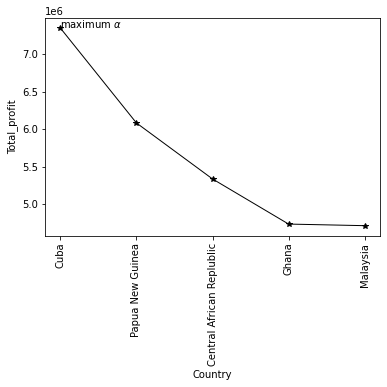

In [14]:
file.groupby('Country')['Total Profit'].sum().nlargest().plot(color='black',marker='*',linewidth='1')
plt.text(0,7351820.83, r'maximum $\alpha$')
plt.ylabel('Total_profit')
plt.xticks(np.arange(5),('Cuba','Papua New Guinea','Central African Replublic','Ghana','Malaysia'),rotation=90)
plt.show()